### Importing the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

### Reading the data

In [2]:
real_estate = pd.read_csv('sao_paulo_real_estate.csv')

### Checking data structure

In [3]:
# Data composition
print(real_estate.head())

           tax_id                       street_name  street_number  \
0  083.010.0019-8                      R EDSON DIAS             82   
1  056.149.0117-5               R ANTONIO DE BARROS            486   
2  077.001.0001-2  AV RAIMUNDO PEREIRA DE MAGALHAES           5028   
3  162.001.0006-2                   R ZACARIAS DACA            600   
4  077.001.0001-2  AV RAIMUNDO PEREIRA DE MAGALHAES           5028   

     complement  district reference  zip_code transaction_nature  \
0           NaN       NaN       NaN   5421060           buy_sell   
1   TW 2 AP 912       NaN       NaN   3089000           buy_sell   
2   TW A AP 911  PIRITUBA       NaN   2938000           buy_sell   
3   TW 2 AP 301       NaN       NaN   4444020           buy_sell   
4  TW A AP 1307  PIRITUBA       NaN   2938000           buy_sell   

   transaction_value_BRL        date  ...  registry_number  property_id  \
0                1872000  20/09/2022  ...               10         9550   
1                 26

In [4]:
# Data lengh
len(real_estate)

86695

In [5]:
# Describing the data 
print(real_estate.describe())

       street_number      zip_code  transaction_value_BRL  cadastral_value  \
count   86695.000000  8.669500e+04           8.669500e+04     8.669500e+04   
mean    10826.947448  3.982333e+06           6.545039e+05     4.140272e+05   
std     29967.216914  1.656258e+06           3.371283e+06     2.590716e+06   
min         0.000000  1.001001e+06           0.000000e+00     0.000000e+00   
25%       155.000000  3.032010e+06           2.165000e+05     2.885400e+04   
50%       403.000000  4.107001e+06           3.000000e+05     1.900350e+05   
75%      1085.000000  5.021000e+06           5.500000e+05     3.972220e+05   
max     99999.000000  8.490800e+06           5.215211e+08     4.177697e+08   

       tax_base_value  mortgage_value  registry_number   property_id  \
count    8.669500e+04    8.669500e+04     86695.000000  8.669500e+04   
mean     6.961384e+05    1.063969e+05        10.124379  1.820184e+05   
std      3.424368e+06    1.797292e+05         4.691198  1.490747e+05   
min      

### General Data Cleaning 

In [6]:
# Checking duplicated 
print(real_estate.duplicated().value_counts())

False    86232
True       463
dtype: int64


In [40]:
# Droping duplicated 
real_estate = real_estate.drop_duplicates()

### Data Analysis 

### Question 1: Which property type has the biggest sales volume?

#### Sales Volume Ranking by Property Type

Text(0, 0.5, 'Frequency')

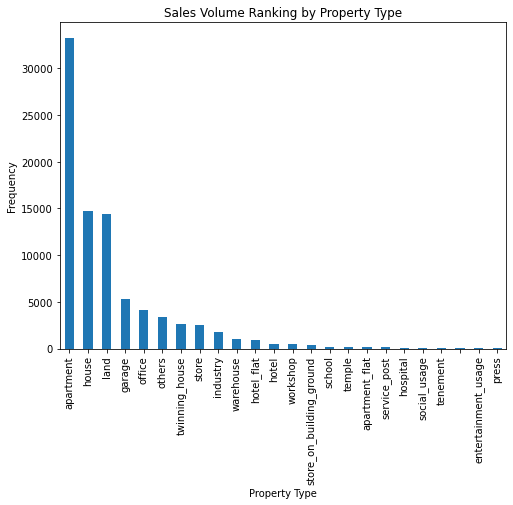

In [31]:
# Grouping the data 
sales_dist = real_estate.groupby('description_1')['description_1'].count().sort_values(ascending=False)

# Setting the figure size 
fig, ax = plt.subplots(figsize=(8, 6))

# Ploting a bar chart to vizualize the numbers 
sales_dist.plot(kind ='bar')

# Setting the labels 
plt.title('Sales Volume Ranking by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')

### Question 2: Which property type has the biggest sales volume in value?

#### Total Accumulated Value of Sales Ranking by Property Type   

Text(0, 0.5, 'Total Accumulated Sales')

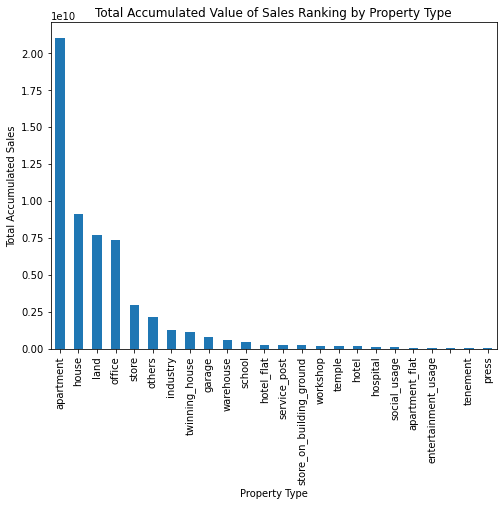

In [34]:
# Grouping the data 
sales_value = real_estate.groupby('description_1')['transaction_value_BRL'].sum().sort_values(ascending = False)

# Setting the figure size 
fig, ax = plt.subplots(figsize=(8, 6))

# Ploting a bar chart 
sales_value.plot(kind = 'bar')

# Setting the labels 
plt.title('Total Accumulated Value of Sales Ranking by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Total Accumulated Sales')

### Question 3: Which property type has the biggest median sales price?

#### Median Sale Price Ranking by Type of Property

Text(0, 0.5, 'Median Sale Price')

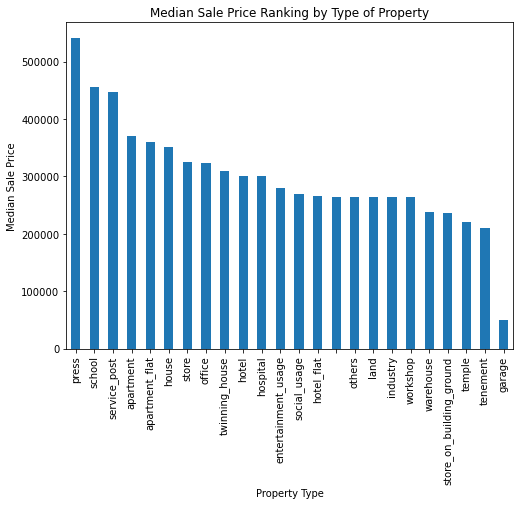

In [32]:
# Grouping the data
sales_value = real_estate.groupby('description_1')['transaction_value_BRL'].median().sort_values(ascending = False)

# Setting the figure size 
fig, ax = plt.subplots(figsize=(8, 6))

# Ploting a bar chart 
sales_value.plot(kind = 'bar')

# Setting the labels 
plt.title('Median Sale Price Ranking by Type of Property')
plt.xlabel('Property Type')
plt.ylabel('Median Sale Price')

#### Answer: Looking at the whole dataset, it appears that apartment is the most popular type of properties, with the highest number of sales and total sales value. Additionally, this property type is in the top 5 for median price, indicating that they are in high demand and command relatively high prices. 

#### Given these factors, it may be worthwhile to focus on apartment, as it is in high demand and can offer good returns on investment. However, it's important to consider other factors such as location, property condition, and market trends when making investment decisions.

### Question 4: What is the price range and distribution for apartments?

#### Apartments Price Distribution and Range

C:\Users\Jose Luiz\AppData\Local\Temp\ipykernel_14296\38240384.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  re_ap = real_estate_filtered[real_estate['description_1'] == 'apartment']


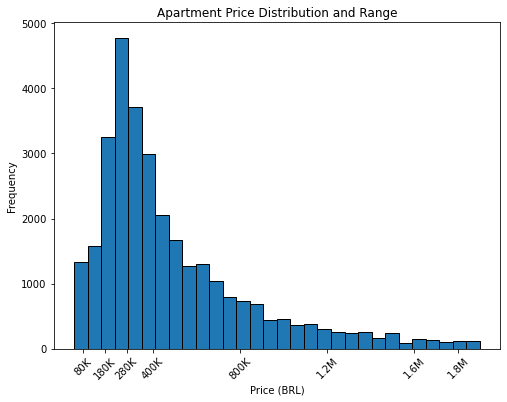

<Figure size 432x288 with 0 Axes>

In [36]:
# Exclusing price outliers from real_estate data
lower_bound = real_estate['transaction_value_BRL'].quantile(0.05)
upper_bound = real_estate['transaction_value_BRL'].quantile(0.95)

real_estate_filtered = real_estate[(real_estate['transaction_value_BRL'] >= lower_bound) & (real_estate['transaction_value_BRL'] <= upper_bound)]

# Leaving just apartments in the data 
re_ap = real_estate_filtered[real_estate['description_1'] == 'apartment']

# Getting apartment prices 
ap_price = re_ap[re_ap['description_1'] == 'apartment'].transaction_value_BRL

# Setting the figure size 
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the histogram
plt.hist(ap_price, bins = 30, edgecolor = 'black')

# Setting the tick marks and labels for the x-axis
xticks = [80000,180000, 280000, 400000, 800000, 1200000, 1600000, 1800000]  # tick positions
xticklabels = [f'{i/1000000:.1f}M' if i >= 1000000 else f'{i/1000:.0f}K' for i in xticks] 
plt.xticks(xticks, xticklabels, rotation=45)

# Setting the labels 
plt.title('Apartment Price Distribution and Range')
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')

# Showing the histogram
plt.show()
plt.clf()


#### Answer: The prices of apartments in the dataset range from 80,000 to 1,830,000 BRL, with the majority of the apartments having a price close to 280,000 BRL. The distribution of prices is skewed to the right, meaning that there are relatively fewer apartments with prices in the higher range.

### Question 4: What is the built area distribution and range among apartments? 

#### Apartments Built Area Distribution and Range

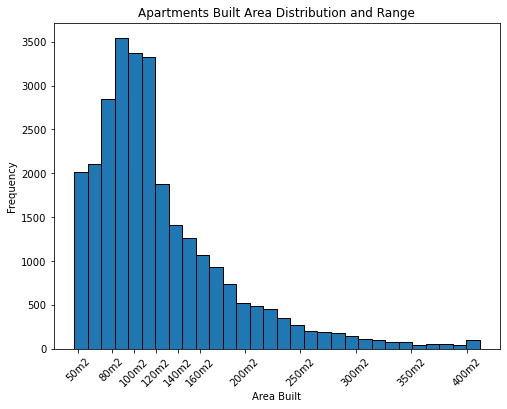

<Figure size 432x288 with 0 Axes>

In [37]:
# Exclusing area built outliers from re_ap data
lower_bound = re_ap['area_built_m2'].quantile(0.05)
upper_bound = re_ap['area_built_m2'].quantile(0.95)

re_ap_area = re_ap[(re_ap['area_built_m2'] >= lower_bound) & (re_ap['area_built_m2'] <= upper_bound)]
                                                              
# Setting the figure size 
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the histogram
plt.hist(re_ap_area['area_built_m2'], bins = 30, edgecolor = 'black')

# Setting the tick marks and labels for the x-axis
xticks = [50, 80, 100, 120, 140, 160, 200, 250, 300, 350, 400]  # tick positions
xticklabels = [f'{i}m2' for i in xticks]  
plt.xticks(xticks, xticklabels, rotation=45)

# Setting the labels 
plt.title('Apartments Built Area Distribution and Range')
plt.xlabel('Area Built')
plt.ylabel('Frequency')

# Showing the histogram
plt.show()
plt.clf()


#### Answer: The data is skewed to the right, which indicates that the majority of apartments have a smaller area_built_m2. Specifically, the most common range of area_built_m2 among apartments is between 60m2 and 125m2.

### Question 5: How the apartment built area afects its price?

#### Apartments Price and Built Area Correlation

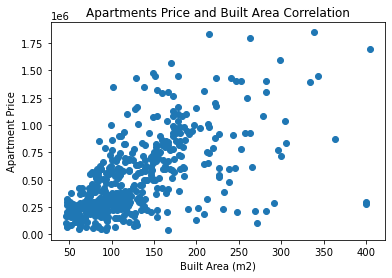

In [38]:
# Creating a data sample
area_price_sample = re_ap_area.sample(n=500)

# Ploting a scatter plot 
plt.scatter(area_price_sample['area_built_m2'], area_price_sample['transaction_value_BRL'])
plt.title('Apartments Price and Built Area Correlation')
plt.xlabel('Built Area (m2)')
plt.ylabel('Apartment Price')

plt.show()

In [39]:
# Apartments built area and price correlation 

corr, p_value = spearmanr(re_ap_area['area_built_m2'], re_ap_area['transaction_value_BRL'])

print("Spearman rank correlation coefficient:", corr)
print("p-value:", p_value)

Spearman rank correlation coefficient: 0.6540468079124848
p-value: 0.0


#### Answer: The analysis reveals that there is a moderate positive correlation between the apartment prices and the built area, indicating that as the built area increases, the price tends to go up. In summary, the results suggest a relationship between these two variables, with the apartment price showing a tendency to increase as the built area increases.

### Conclusion: The data analysis suggests that apartments with areas ranging from 50m2 to 120m2 and prices between 80K to 400K exhibit high liquidity and present a promising area for real estate investments.